**AI-Enabled Marketing Campaign Analysis using Pandas**

In [38]:
import pandas as pd

**Introduction - Dataset Summary**

In [39]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/marketing_campaign_sample.csv') #reading dataset contains marketing campaign data

In [40]:
#Analyzing its structure and summary stats

In [41]:
print(df.head()) #head reads first 5 rows of dataset

     Campaign  Impressions  Clicks Channel  Spend
0  Campaign A        10000     500   Email    200
1  Campaign B        25000    1200  Social    450
2  Campaign C        15000     750  Search    300
3  Campaign D        12000     600   Email    250
4  Campaign E        30000    1000  Social    500


In [42]:
#campaign : Name of the marketing campaign
#impressions : Number of times the ad was shown
#clicks : Number of times the users clicked the ad
#channel : Platform where campaign ran (Email,social,search)
#spend : Total amount spent on campaign


In [43]:
df.columns #To find column names of dataframes

Index(['Campaign', 'Impressions', 'Clicks', 'Channel', 'Spend'], dtype='object')

In [44]:
df.shape  #prints number of rows and cloumns

(15, 5)

In [45]:
df.info() #To find Data type,nullvalues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Campaign     15 non-null     object
 1   Impressions  15 non-null     int64 
 2   Clicks       15 non-null     int64 
 3   Channel      15 non-null     object
 4   Spend        15 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 732.0+ bytes


In [46]:
#df.describe() #summmary

In [47]:
df['Channel'].unique()

array(['Email', 'Social', 'Search'], dtype=object)

In [48]:
df['Channel'].value_counts() #To know which channel used most for marketing campaigns

,count
Channel,
Social,6
Search,5
Email,4


*#DAY 1 - Analyzed the data to understand what it represents, examined each column to identify its meaning, checked column names, detected any null values, verified data types, and calculated basic statistics such as mean and median*

In [49]:
#DAY2

In [50]:
df.isnull().sum()   #it checks how many null values are present in each column

,0
Campaign,0
Impressions,0
Clicks,0
Channel,0
Spend,0


In [51]:
df.duplicated().sum() #checks there is any duplicate values. 0 in the case of no duplicates

np.int64(0)

In [52]:
df.dtypes #checks the datatypes of each column

,0
Campaign,object
Impressions,int64
Clicks,int64
Channel,object
Spend,int64


In [53]:
df['CTR']=df['Clicks']/df['Impressions'] *100 #It adds new columns to the df

In [54]:
df.rename(columns={'Spend':'Spend (INR)'},inplace=True)

In [55]:
df

,Campaign,Impressions,Clicks,Channel,Spend (INR),CTR
0,Campaign A,10000,500,Email,200,5.000000
1,Campaign B,25000,1200,Social,450,4.800000
2,Campaign C,15000,750,Search,300,5.000000
3,Campaign D,12000,600,Email,250,5.000000
4,Campaign E,30000,1000,Social,500,3.333333
5,Campaign F,5000,200,Search,100,4.000000
6,Campaign G,10191,362,Social,256,3.552154
7,Campaign H,5952,184,Search,291,3.091398
8,Campaign I,13064,269,Email,400,2.059094
9,Campaign J,13034,1099,Social,332,8.431794


In [56]:
#No missing values, O duplicates, CTR column added

In [57]:
df.sort_values('CTR',ascending=False)

,Campaign,Impressions,Clicks,Channel,Spend (INR),CTR
13,Campaign N,5050,554,Email,196,10.970297
9,Campaign J,13034,1099,Social,332,8.431794
11,Campaign L,13885,1073,Social,251,7.727764
12,Campaign M,10374,662,Search,246,6.381338
14,Campaign O,12816,652,Social,371,5.087391
2,Campaign C,15000,750,Search,300,5.000000
0,Campaign A,10000,500,Email,200,5.000000
3,Campaign D,12000,600,Email,250,5.000000
1,Campaign B,25000,1200,Social,450,4.800000
10,Campaign K,14904,687,Search,180,4.609501


In [58]:
df['CTR'].describe() #for insight

,CTR
count,15.000000
mean,5.269604
std,2.299783
min,2.059094
25%,3.776077
50%,5.000000
75%,5.734364
max,10.970297


In [59]:
#DAY3

In [60]:
df.groupby('Channel')[['Impressions','Clicks','Spend (INR)','CTR']].mean()  #We grouped channels based on impressions,clicks,Spend(INR)

,Impressions,Clicks,Spend (INR),CTR
Channel,,,,
Email,10028.500000,480.750000,261.5,5.757348
Search,10246.000000,496.600000,223.4,4.616447
Social,17487.666667,897.666667,360.0,5.488739


In [61]:
df.groupby('Channel')['CTR'].mean().sort_values(ascending=False) #We grouped channels based on CTR

,CTR
Channel,
Email,5.757348
Social,5.488739
Search,4.616447


In [62]:
df.groupby('Campaign')[['Impressions','Clicks','Spend (INR)','CTR']].sum() #Grouping campaign based on impressions,clicks,spend

,Impressions,Clicks,Spend (INR),CTR
Campaign,,,,
Campaign A,10000,500,200,5.000000
Campaign B,25000,1200,450,4.800000
Campaign C,15000,750,300,5.000000
Campaign D,12000,600,250,5.000000
Campaign E,30000,1000,500,3.333333
Campaign F,5000,200,100,4.000000
Campaign G,10191,362,256,3.552154
Campaign H,5952,184,291,3.091398
Campaign I,13064,269,400,2.059094


In [63]:
#VISUALISATION

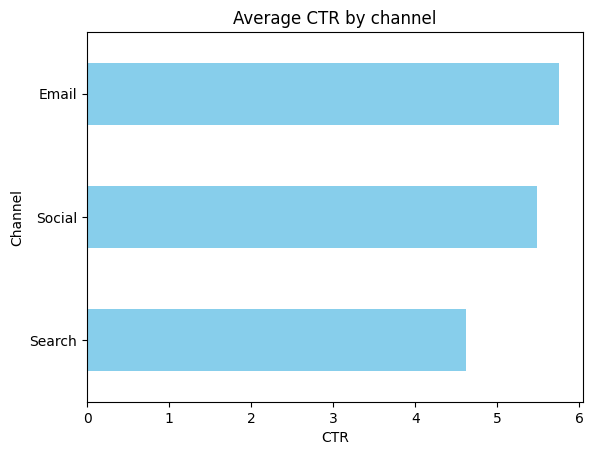

In [64]:
import matplotlib.pyplot as plt
df.groupby('Channel')['CTR'].mean().sort_values().plot(kind='barh',color='skyblue',)
plt.title('Average CTR by channel')
plt.xlabel('CTR')
plt.ylabel('Channel')
plt.show()

In [65]:
#Email has highest CTR
#Based on money spend, Campaign E is on Top

In [66]:
#DAY 4

In [67]:
#Visualize and Communicate like a pro !

In [68]:
#1. BAR CHART AND CTR% By Campaign

<ipython-input-69-1333971358>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_ctr.index,y=campaign_ctr.values,palette='coolwarm')


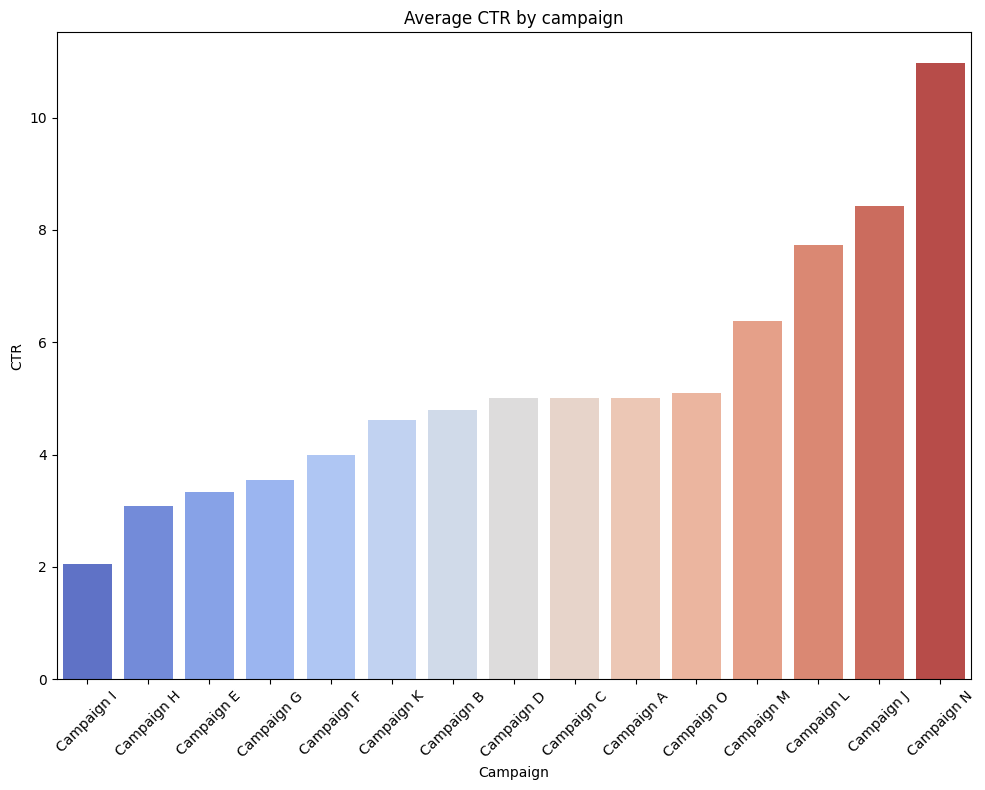

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

campaign_ctr = df.groupby('Campaign')['CTR'].mean().sort_values()

#plot bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=campaign_ctr.index,y=campaign_ctr.values,palette='coolwarm')
plt.title("Average CTR by campaign")
plt.xlabel("Campaign")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [70]:
#Campaign 'N' delivered the highest CTR,suggesting more effective targeting or messaging.

Total Spend By channel

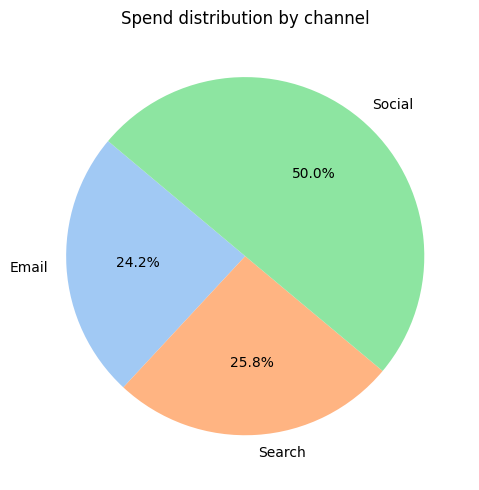

In [71]:
channel_spend = df.groupby('Channel')['Spend (INR)'].sum().sort_values()

plt.figure(figsize=(8,5))
plt.pie(channel_spend,labels=channel_spend.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Spend distribution by channel')
plt.tight_layout()
plt.show()

In [72]:
#"Social received the largest share of ad spend."

*"Social is leading in Impressions, Clicks, and Spend, indicating that investing more in Social was a good decision. However, Email has the highest CTR, suggesting that focusing more on Email could yield excellent results due to its high ad click-through rate."*

In [73]:
#FINAL INSIGHTS

#Camapaign N had the highest CTR (10.97%)
#Email channel had the best engagement (CTR 5.75%)
#Social had highest spend,but Email delivered better results

#-Tools used
#- Python, Pandas,Matplotlib,Seaborn